In [233]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.sparse.linalg as ll
import pandas as pd
from matplotlib import cm

from sklearn.neighbors import KernelDensity
import scipy.stats as st
from sklearn.cluster import KMeans

# 2. Density Estimation: Psychological Experiments

In [244]:
dat = pd.read_csv("data/n90pol.csv",header=0)
m, n = dat.shape
acc = np.array(dat['acc'])
amyg = np.array(dat['amygdala'])

## a. 

/var/folders/1p/cp6mx14s7fbcxp3s3vtxppl00000gn/T/ipykernel_36188/2220436136.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


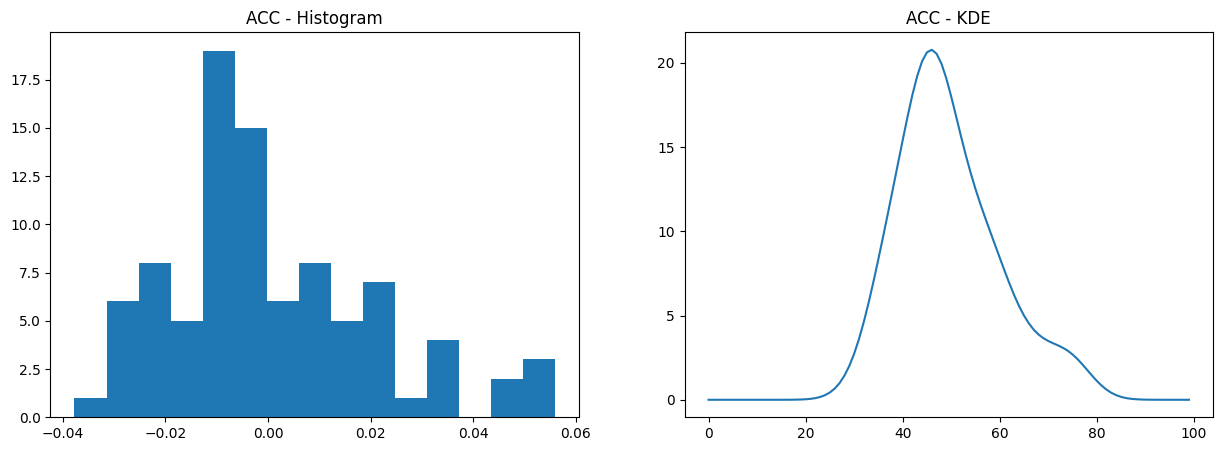

In [245]:
# Histogram
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
hits = plt.hist(acc, bins=15)
plt.title('ACC - Histogram') 

# KDE
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html
xplot = np.linspace(-0.1, 0.1, 100)[:, np.newaxis]
h1 = 1.06*statistics.stdev(acc)*90**(-1/5)
kde = KernelDensity(kernel="gaussian", bandwidth=h1)
acc_kde = kde.fit(acc.reshape(-1, 1))
log_dens_acc = kde.score_samples(xplot)

plt.subplot(1, 2, 2)
plt.plot(np.exp(log_dens_acc))
plt.title('ACC - KDE') 
plt.show()

/var/folders/1p/cp6mx14s7fbcxp3s3vtxppl00000gn/T/ipykernel_36188/2800097473.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


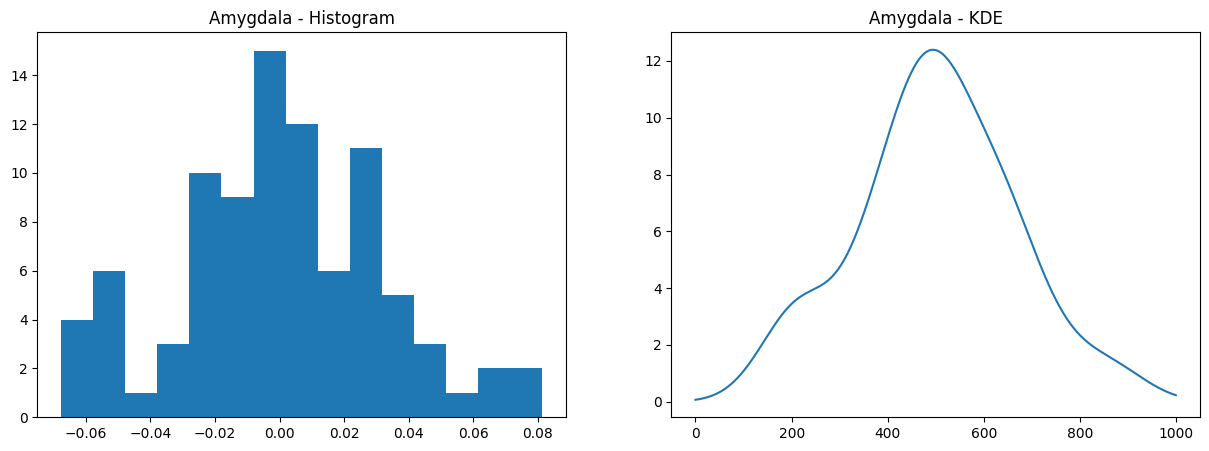

In [246]:
# Histogram
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
hist = plt.hist(amyg, bins=15)
plt.title('Amygdala - Histogram') 

# KDE
xplot = np.linspace(-0.1, 0.1, 1000)[:, np.newaxis]
h2 = 1.06*statistics.stdev(amyg)*90**(-1/5)
kde = KernelDensity(kernel="gaussian", bandwidth=h2)
acc_kde = kde.fit(amyg.reshape(-1, 1))
log_dens_acc = kde.score_samples(xplot)

plt.subplot(1, 2, 2)
plt.plot(np.exp(log_dens_acc))
plt.title('Amygdala - KDE') 
plt.show()

## b.

/var/folders/1p/cp6mx14s7fbcxp3s3vtxppl00000gn/T/ipykernel_36188/345476888.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Blues')


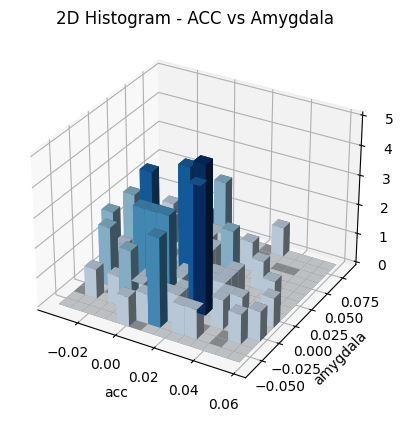

In [237]:

# https://stackoverflow.com/questions/8437788/how-to-correctly-generate-a-3d-histogram-using-numpy-or-matplotlib-built-in-func

x = acc.reshape(len(acc))  #turn x,y data into numpy arrays
y = amyg.reshape(len(amyg)) 

fig = plt.figure()         
ax = fig.add_subplot(111, projection='3d')


hist, xedges, yedges = np.histogram2d(x, y, bins=(15,15))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('Blues')  
max_height = np.max(dz) 
min_height = np.min(dz)

rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.title("2D Histogram - ACC vs Amygdala")
plt.xlabel("acc")
plt.ylabel("amygdala")
plt.show()



## c.

In [228]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

corr, _ = spearmanr(acc, amyg)
print('Spearmans correlation: %.3f' % corr)

corr1, _ = pearsonr(acc, amyg)
print('Pearsons correlation: %.3f' % corr1)

Spearmans correlation: -0.101
Pearsons correlation: -0.128


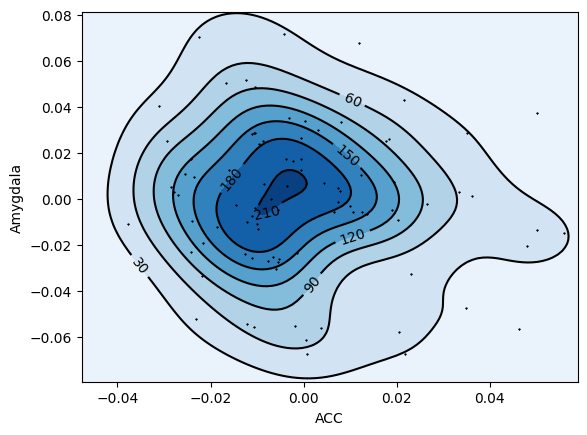

In [238]:
# Plot 2D KDe
# https://stackoverflow.com/questions/30145957/plotting-2d-kernel-density-estimation-with-python

x = acc.reshape(len(acc)) 
y = amyg.reshape(len(amyg)) 

xmin, xmax = min(x)-.01, max(x)+.003
ymin, ymax = min(y)-.012, max(y)

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])


kernel = st.gaussian_kde(values,bw_method='silverman')
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure()
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Contourf plot
cfset = ax.contourf(xx, yy, f, cmap='Blues')

# Contour plot
cset = ax.contour(xx, yy, f, colors='k')

# Plot points
ax.plot(x,y, '*', markersize = 1, color = 'black')

# Label plot
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('ACC')
ax.set_ylabel('Amygdala')


plt.show()


## d.

Orientation: 2
acc_mean = -0.0148
amy_mean = 0.0191


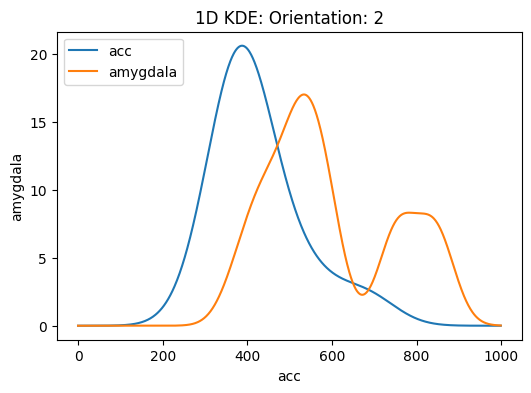

Orientation: 3
acc_mean = 0.0017
amy_mean = 0.0006


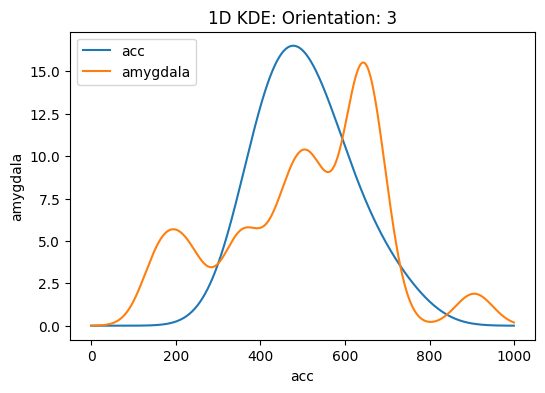

Orientation: 4
acc_mean = 0.0013
amy_mean = -0.0047


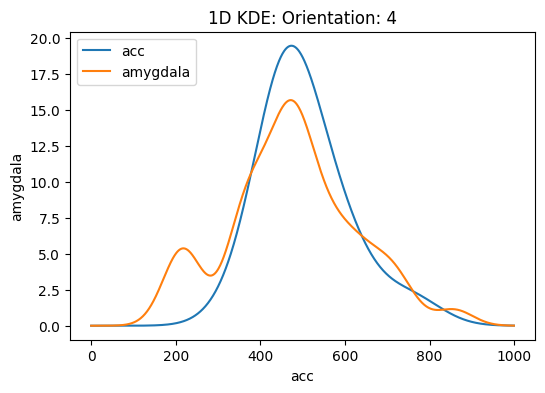

Orientation: 5
acc_mean = 0.0081
amy_mean = -0.0057


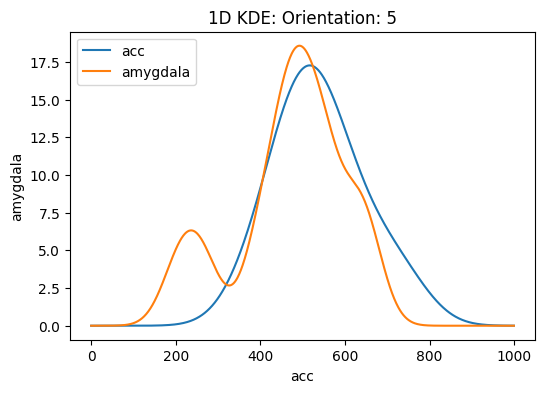

In [247]:


X_plot = np.linspace(-0.1, 0.1, 1000)[:, np.newaxis]

for i in range(2,6):
    print("Orientation: " + str(i))
    i1 = i
    orient = dat[dat['orientation'] == i]
    acc = np.array(orient['acc']).reshape(-1, 1)
    amygdala = np.array(orient['amygdala']).reshape(-1, 1)

    kde_acc = KernelDensity(kernel="gaussian", bandwidth=h2).fit(acc)
    kde_amy = KernelDensity(kernel="gaussian", bandwidth=h1).fit(amygdala)

    fig, ax = plt.subplots(figsize=(6, 4))
    
    log_dens_acc = kde_acc.score_samples(X_plot)
    plt.plot(np.exp(log_dens_acc), label='acc')
    
    #plt.clf()
    
    log_dens_amy = kde_amy.score_samples(X_plot)
    plt.plot(np.exp(log_dens_amy),label='amygdala')
    
    #plt.clf()
        
    acc_mean = np.mean(acc)
    amy_mean = np.mean(amygdala)
    
    print("acc_mean = " + str(round(acc_mean,4)))
    print("amy_mean = " + str(round(amy_mean,4)))
    plt.title(f"1D KDE: Orientation: {i}")
    plt.legend(loc="upper left")
    plt.xlabel("acc")
    plt.ylabel("amygdala")
    plt.show()



## e.

Orientation: 2


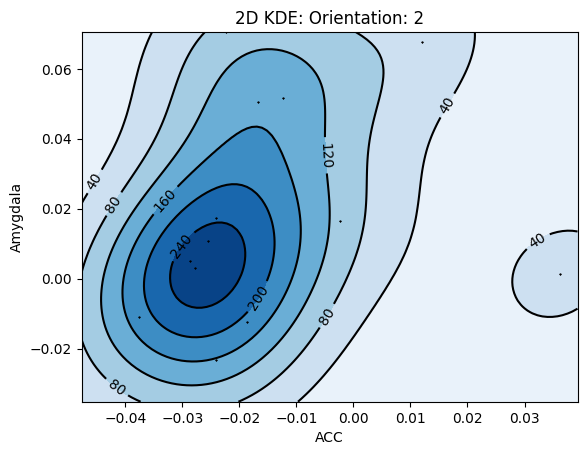

Orientation: 3


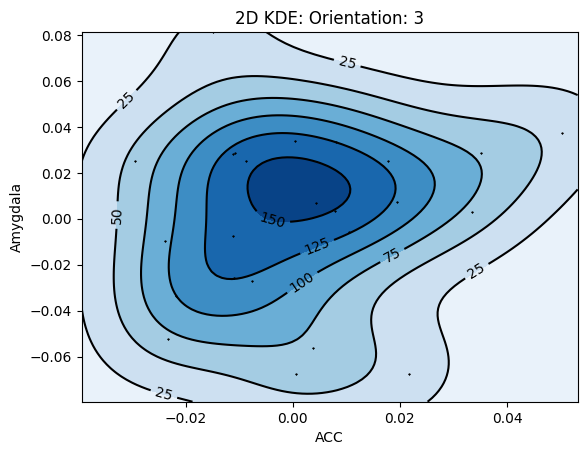

Orientation: 4


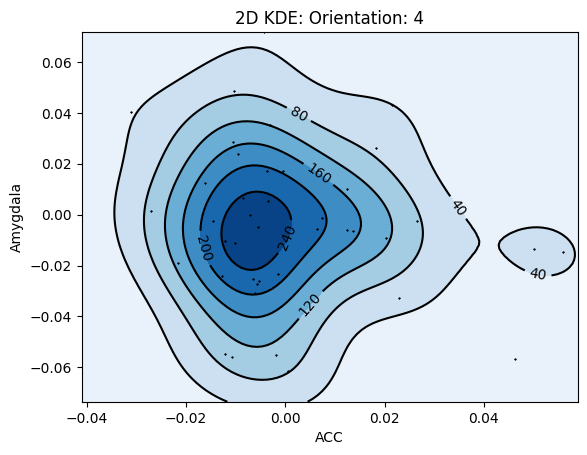

Orientation: 5


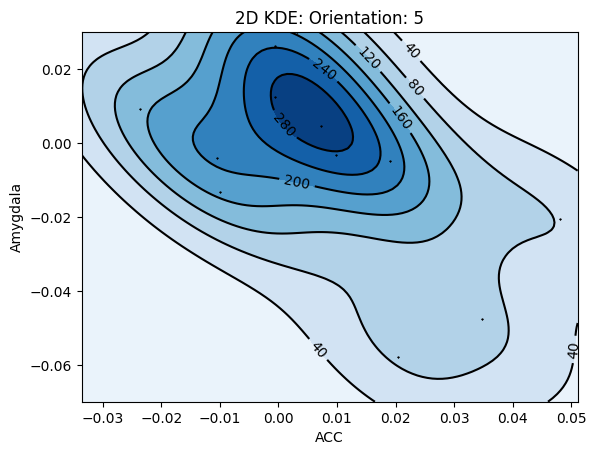

In [248]:
X_plot = np.linspace(-0.1, 0.1, 1000)[:, np.newaxis]





for i in range(2,6):
    print("Orientation: " + str(i))
    
    orient = dat[dat['orientation'] == i]
    acc = np.array(orient['acc']).reshape(-1, 1)
    amyg = np.array(orient['amygdala']).reshape(-1, 1)
    
    x = acc.reshape(len(acc)) 
    y = amyg.reshape(len(amyg)) 

    xmin, xmax = min(x)-.01, max(x)+.003
    ymin, ymax = min(y)-.012, max(y)

    # Peform the kernel density estimate
    xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values,bw_method='silverman')
    f = np.reshape(kernel(positions).T, xx.shape)

    fig = plt.figure()
    ax = fig.gca()
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    # Contourf plot
    cfset = ax.contourf(xx, yy, f, cmap='Blues')
    ## Or kernel density estimate plot instead of the contourf plot
    # ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])

    # Contour plot
    cset = ax.contour(xx, yy, f, colors='k')

    # Plot points
    ax.plot(x,y, '*', markersize = 1, color = 'black')

    # Label plot
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel('ACC')
    ax.set_ylabel('Amygdala')
    ax.set_title(f"2D KDE: Orientation: {i}")
    


    plt.show()

    

# 3. Implementing EM for MNIST dataset

In [249]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.sparse.linalg as ll
import pandas as pd
import scipy.io
from scipy.stats import multivariate_normal as mvn
from sklearn.metrics import confusion_matrix

In [250]:


data = scipy.io.loadmat('data/data.mat')['data']
label = scipy.io.loadmat('data/label.mat')['trueLabel']

data = np.array(data).T # each row is a data point 
label = np.array(label)

mu_original = np.mean(data, axis = 0, keepdims = True)
ndata = data - mu_original # shape = (784,1990)

m, n = ndata.shape
C = np.matmul(ndata.T, ndata)/m

# pca the data
d = 4  # reduced dimension
V,Gamma,_ = np.linalg.svd(C)
V = V[:, :d]
Gamma = np.diag(Gamma[:d])

# project the data to the top 2 principal directions
# y = label
pdata = np.dot(ndata,V)




In [251]:
# ISyE 6740 Module 7 Demo Code 
K = 2

# random seed
seed = 5

# initialize prior
np.random.seed(seed)
pi = np.random.random(K)
pi = pi/np.sum(pi)

# initial mean and covariance
# np.random.seed(seed)
mu = np.random.randn(K,d)
mu_old = mu.copy()

sigma = []
for ii in range(K):
    # to ensure the covariance psd
    seed = 1 if ii == 0 else 4
    np.random.seed(seed)
    dummy = np.random.randn(d, d)
    sigma.append(dummy@dummy.T + np.eye(d))
    
# initialize the posterior
tau = np.full((m, K), fill_value=0.)

# # parameter for countour plot
# xrange = np.arange(-5, -5, 0.1)
# yrange = np.arange(-5, -5, 0.1)

# ####
maxIter= 100
tol = 1e-3

# plt.ion()
log_likelihood = []    
for ii in range(100):

    # E-step    
    for kk in range(K):
        sigma_det = np.linalg.det(sigma[kk])
        # print(sigma_det)
        tau[:, kk] = pi[kk] * mvn.pdf(pdata, mu[kk], sigma[kk])
        # print(tau[:,kk])
    # normalize tau
    sum_tau = np.sum(tau, axis=1)
    sum_tau.shape = (m,1)    
    tau = np.divide(tau, np.tile(sum_tau, (1, K)))
     
    log_likelihood.append(np.sum(np.log(sum_tau)))
    # M-step
    for kk in range(K):
        # update prior
        pi[kk] = np.sum(tau[:, kk])/m
        
        # update component mean
        mu[kk] = pdata.T @ tau[:,kk] / np.sum(tau[:,kk], axis = 0)
        
        # update cov matrix
        dummy = pdata - np.tile(mu[kk], (m,1)) # X-mu
        sigma[kk] = dummy.T @ np.diag(tau[:,kk]) @ dummy / np.sum(tau[:,kk], axis = 0)
        
    # print('-----iteration---',ii)  
    # tau_color = np.hstack((tau,np.ones((m,1))))  
    # plt.scatter(pdata[:,0], pdata[:,1], c= tau_color)
    # plt.axis('scaled')
    # plt.draw()
    # plt.pause(0.1)
    if np.linalg.norm(mu-mu_old) < tol:
        print('training coverged')
        break
    mu_old = mu.copy()
    if ii==99:
        print('max iteration reached')
        break

training coverged


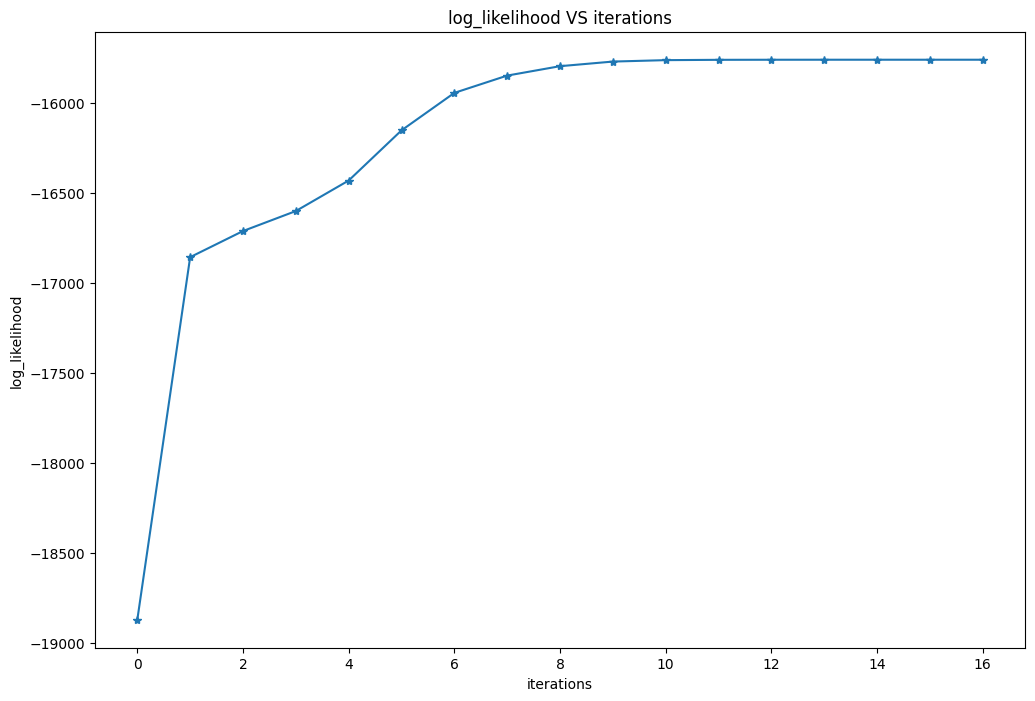

In [252]:



plt.figure(figsize = (12,8))
plt.plot(log_likelihood,'-*')
plt.title('log_likelihood VS iterations')
plt.ylabel('log_likelihood')
plt.xlabel('iterations')

plt.show()



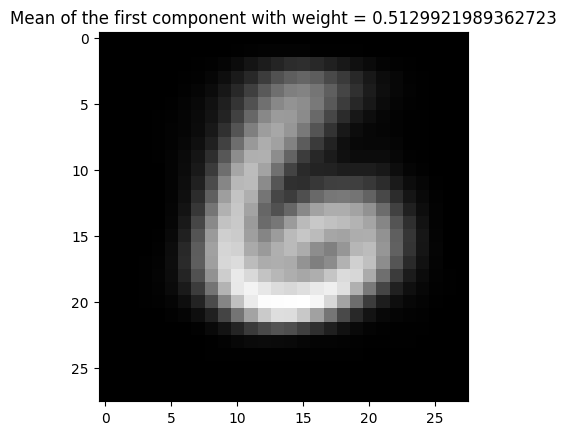

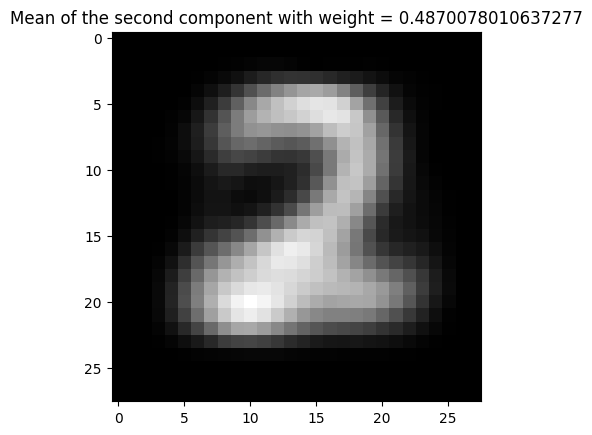

In [253]:


first_mean = (V @ mu[0] + mu_original).reshape((28,28)).T
plt.imshow(first_mean, cmap = 'gray')
plt.title('Mean of the first component with weight = ' + str(pi[0]))

plt.show()

second_mean = (V @ mu[1] + mu_original).reshape((28,28)).T
plt.imshow(second_mean, cmap = 'gray')
plt.title('Mean of the second component with weight = ' + str(pi[1]))

plt.show()



/var/folders/1p/cp6mx14s7fbcxp3s3vtxppl00000gn/T/ipykernel_36188/2853524547.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('YlGnBu')


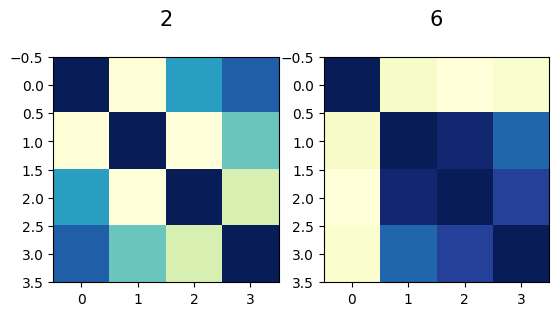

In [254]:

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm as cm
fig, (ax1, ax2) = plt.subplots(1, 2)

cmap = cm.get_cmap('YlGnBu')
V1 = V @ sigma[0]
V2 = V @ sigma[1]
df0 = pd.DataFrame(V1)
df1 = pd.DataFrame(V2)


cax1 = ax1.imshow(df0.corr(), interpolation="nearest", cmap=cmap)
#ax1.grid(True)
ax1.set_title('2\n',fontsize=15)


cax2 = ax2.imshow(df1.corr(), interpolation="nearest", cmap=cmap)
#ax1.grid(True)
ax2.set_title('6\n',fontsize=15)

plt.show()




In [255]:
print(tau[:,0])
label_em = np.argmax(tau,axis = 1)
label_em[label_em == 1] = 2
label_em[label_em == 0] = 6
print('Mis-classification rate for digit' + str('2') + 'is')

kmeans = KMeans(n_clusters=2).fit(pdata)
label_kmeans=kmeans.labels_
label_kmeans[label_kmeans == 0] = 2
label_kmeans[label_kmeans == 1] = 6

print(confusion_matrix(label[0], label_kmeans))
print(confusion_matrix(label[0], label_em))

label2 = np.where(label == 2, label, 0)
label6 = np.where(label == 6, label, 0)
print(np.sum(label2 == label_em)) # 
print(np.sum(label == 2))

[3.05911305e-02 5.60941340e-05 6.67157602e-02 ... 9.19873197e-01
 9.99999979e-01 9.99999988e-01]
Mis-classification rate for digit2is
[[969  63]
 [ 76 882]]
[[965  67]
 [  9 949]]
965
1032


/Users/patrickgardocki/opt/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
